In [60]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

A time series is a sequence where a metric is recorded over regular time intervals.

Depending on the frequency, a time series can be of yearly (ex: annual budget), quarterly (ex: expenses), monthly (ex: air traffic), weekly (ex: sales qty), daily (ex: weather), hourly (ex: stocks price), minutes (ex: inbound calls in a call canter) and even seconds wise (ex: web traffic).

Forecasting is the next step where you want to predict the future values the series is going to take.

ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

ARIMA is a popular and powerful time series forecasting method that models the relationship between a series and its lags (auto-regression) and differences (integration), along with a moving average term. ARIMA models are effective for handling stationary data and can capture both short-term and long-term patterns.

In [61]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [62]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [63]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [64]:
df_airline.dropna(axis=0,inplace=True)

In [65]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [66]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [67]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [68]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [69]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [70]:
df_airline.set_index('Month',inplace=True)

In [71]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

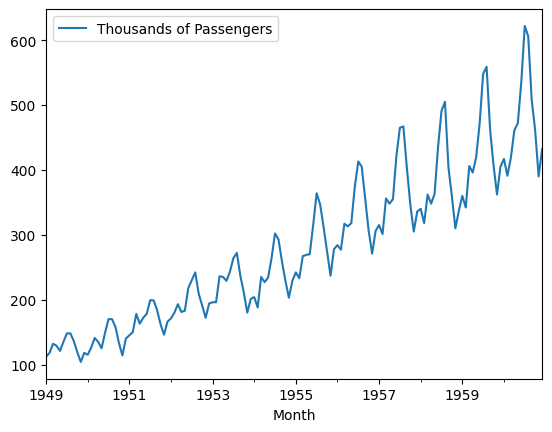

In [72]:
df_airline.plot()

In [73]:
from statsmodels.tsa.stattools import adfuller

#### Stochastic trend

A stochastic trend, also known as a random walk with drift, refers to a type of pattern in a time series where the data appears to follow a gradual, persistent movement over time that is accompanied by random fluctuations. In other words, a stochastic trend suggests that the data has a tendency to move in a certain direction, but there is also a degree of randomness or unpredictability involved.

Stochastic trends are a common characteristic of non-stationary time series data, which means that the data does not exhibit constant statistical properties like a stable mean and variance over time. Instead, the mean and other statistical properties of the data gradually change, indicating the presence of a long-term trend.

A key feature of a stochastic trend is that it is unpredictable in the long run. While you might observe a general upward or downward movement, the specific values at each time point are influenced by random factors that cannot be reliably predicted. This makes forecasting challenging because the future values of the time series are uncertain due to the random component.

An example of a time series exhibiting a stochastic trend is a random walk with drift. Imagine a stock price that, on average, is increasing by a certain amount over time, but individual price movements from day to day are influenced by random factors. Another example could be the population growth of a city, where the trend suggests steady growth, but annual population changes are influenced by random factors like birth rates, migration, and other demographic shifts.

Identifying a stochastic trend is crucial in time series analysis because it can affect the assumptions of many modeling techniques. If a time series exhibits a stochastic trend, it's usually non-stationary, which means that standard techniques that assume stationarity might not be applicable. Differencing the data (subtracting each observation from the previous one) is a common approach to remove the stochastic trend and make the data stationary, allowing for more accurate modeling and analysis.

In summary, a stochastic trend refers to a time series with a persistent, gradual movement in a certain direction combined with random fluctuations. It represents a non-stationary pattern that requires special consideration in time series analysis and modeling.

#### Augmented Dickey-Fuller (ADF) test

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a given time series is stationary or non-stationary. Stationarity is a fundamental concept in time series analysis that indicates whether the statistical properties of a time series, such as mean and variance, remain constant over time.

The ADF test is an extension of the Dickey-Fuller test and accounts for potential autocorrelation in the time series data. It is often used to check for the presence of a unit root in a time series, which is a key indicator of non-stationarity. A unit root implies that the time series has a stochastic trend and does not revert to a constant mean over time.

The ADF test involves the following hypotheses:

Null Hypothesis (H0): The time series has a unit root, indicating that it is non-stationary. It has a stochastic trend and does not exhibit stationarity.

Alternative Hypothesis (H1): The time series does not have a unit root, indicating that it is stationary. It does not have a stochastic trend.

The test statistic from the ADF test is compared to critical values from a specific distribution to determine whether to reject the null hypothesis and conclude that the data is stationary.

Interpreting the ADF Test Results:

If the test statistic is less than the critical value, you can reject the null hypothesis and conclude that the data is stationary. This suggests that the data exhibits no unit root and has a constant mean over time.

If the test statistic is greater than the critical value, you fail to reject the null hypothesis, indicating that the data is non-stationary. This suggests that the data has a unit root and exhibits a stochastic trend.

In [74]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [75]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060482
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Differencing is a common technique in time series analysis to remove trends and make the data more suitable for modeling.
The first difference is obtained by subtracting each observation from its previous observation. This helps in removing the trend component from the data.

This is a common technique used in time series analysis to remove trends and make the data more suitable for modeling. The first difference is obtained by subtracting each observation from its previous observation.

In [76]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [77]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [78]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699994
p- value: 0.0542132902838255
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


The idea behind performing a second difference is to make the data even more stationary. This can be particularly useful when the first difference still shows some residual patterns or seasonality. By applying the second difference, you're aiming to reduce the influence of any lingering trends or patterns, creating a more suitable dataset for modeling

In [79]:
## Use Techniques Differencing 
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [80]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [81]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468505
p- value: 2.7328918500142407e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [82]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [86]:
df_airline.head(28)

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
1949-06-01,135.0,14.0,22.0,NaN
1949-07-01,148.0,13.0,-1.0,NaN
1949-08-01,148.0,0.0,-13.0,NaN
1949-09-01,136.0,-12.0,-12.0,NaN


In [87]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514954
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [88]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

AutoCorrelation (ACF) and Partial AutoCorrelation (PACF) are statistical measures used to analyze the relationships between a time series and its lagged values. These measures provide insights into the temporal dependencies and patterns present in the data, which are crucial for selecting appropriate models like ARIMA (AutoRegressive Integrated Moving Average) for time series forecasting.

* AutoCorrelation Function (ACF) Plot:

The ACF plot shows the correlation between a time series and its lagged values. It helps identify the presence of any significant autocorrelation at different lags. An ACF plot can indicate the potential order of autoregressive (AR) terms in an ARIMA model.

* Partial AutoCorrelation Function (PACF) Plot:

The PACF plot shows the correlation between a time series and its lagged values, while removing the effects of intervening lags. It helps identify the direct relationship between a time point and its lagged values, without the influence of other lags. A PACF plot can indicate the potential order of moving average (MA) terms in an ARIMA model.

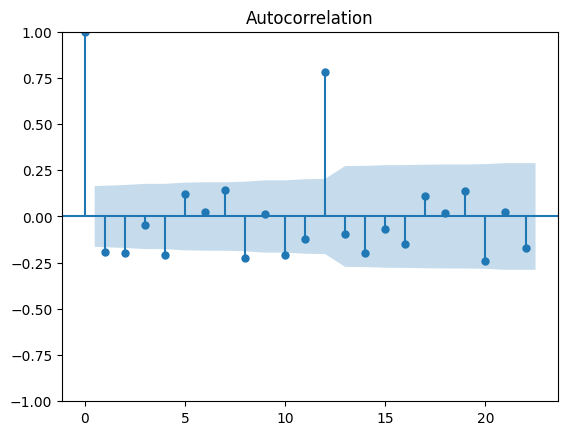

In [89]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

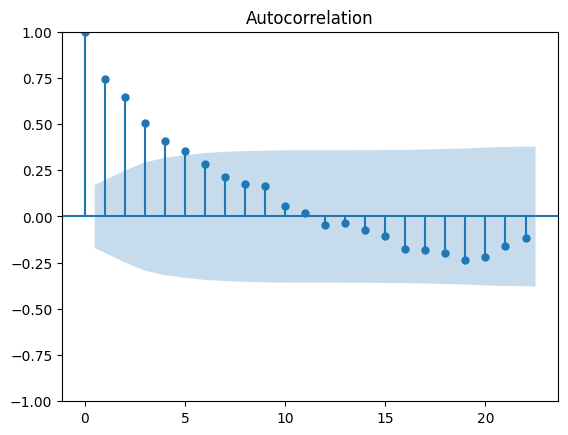

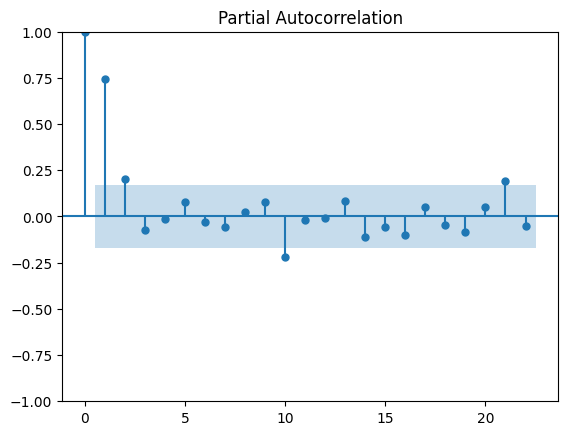

In [90]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

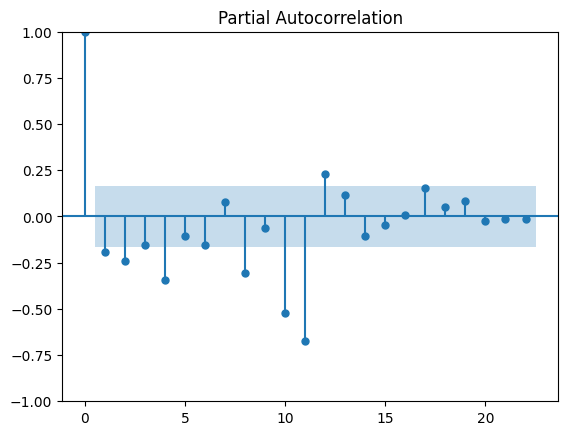

In [91]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

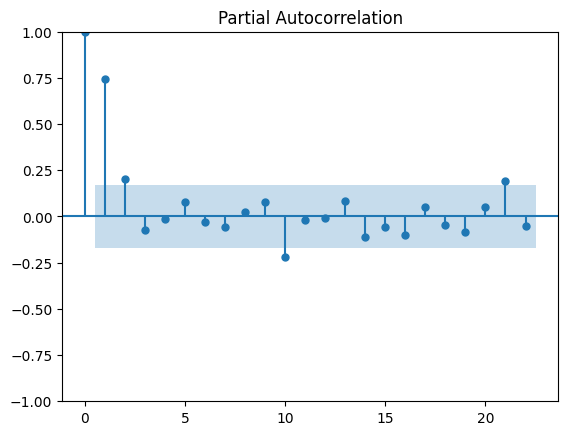

In [92]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [93]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [94]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [95]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [96]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [33]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [97]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

## Time series forecasting with ARIMA

Time Series forecasting with ARIMA (AutoRegressive Integrated Moving Average) is a widely used statistical method for predicting future values of a time series data based on its historical patterns. ARIMA models are particularly effective for time series data that exhibit temporal dependencies, such as trends and seasonality. The acronym ARIMA stands for AutoRegressive Integrated Moving Average:

- **AutoRegressive (AR):** This component models the relationship between a current value and its past values. It captures the effect of previous observations on the current observation. An AR(p) model uses the past p observations to predict the next value.

- **Integrated (I):** This component deals with making the time series stationary. Stationarity means that the statistical properties of the time series, such as mean and variance, do not change over time. If the time series is not stationary, differencing can be applied to make it stationary. The order of differencing is denoted by the parameter d.

- **Moving Average (MA):** This component models the relationship between a current value and past forecast errors. It captures the effect of previous forecast errors on the current observation. An MA(q) model uses the past q forecast errors to predict the next value.

ARIMA models are defined by three main parameters: p, d, and q.

- **p (AR Order):** The number of lagged observations used for the auto-regressive component. It indicates how far back in time you're looking for dependencies.

- **d (Integration Order):** The number of differencing operations needed to make the time series stationary. It represents the degree of differencing required.

- **q (MA Order):** The number of lagged forecast errors used for the moving average component. It indicates how far back in time you're looking for dependencies in forecast errors.

For example, an ARIMA(2,1,1) model has an autoregressive order of 2, a differencing order of 1, and a moving average order of 1. This means it uses the past two values and the past one forecast error to predict the current value, while also performing one level of differencing to make the data stationary.


In [98]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [99]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(0,2,0))

d:\Data_Science_Notes\dsenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Data_Science_Notes\dsenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Data_Science_Notes\dsenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [100]:
model_Arima_fit=model_ARIMA.fit()

In [101]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(0, 2, 0)   Log Likelihood                -385.792
Date:                     Sat, 24 Aug 2024   AIC                            773.584
Time:                             20:03:35   BIC                            775.991
Sample:                         01-01-1949   HQIC                           774.550
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       714.5859    102.414      6.977      0.000     513.858     915.314
===================================================================================
Ljung-Box (L1) (Q):                   4.59   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.03   Prob(JB):                         0.42
Heteroskedasticity (H):               3.19   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [103]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [104]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [105]:
pred

1956-01-01     319.0
1956-02-01     360.0
1956-03-01     401.0
1956-04-01     442.0
1956-05-01     483.0
1956-06-01     524.0
1956-07-01     565.0
1956-08-01     606.0
1956-09-01     647.0
1956-10-01     688.0
1956-11-01     729.0
1956-12-01     770.0
1957-01-01     811.0
1957-02-01     852.0
1957-03-01     893.0
1957-04-01     934.0
1957-05-01     975.0
1957-06-01    1016.0
1957-07-01    1057.0
1957-08-01    1098.0
1957-09-01    1139.0
1957-10-01    1180.0
1957-11-01    1221.0
1957-12-01    1262.0
1958-01-01    1303.0
1958-02-01    1344.0
1958-03-01    1385.0
1958-04-01    1426.0
1958-05-01    1467.0
1958-06-01    1508.0
1958-07-01    1549.0
1958-08-01    1590.0
1958-09-01    1631.0
1958-10-01    1672.0
1958-11-01    1713.0
1958-12-01    1754.0
1959-01-01    1795.0
1959-02-01    1836.0
1959-03-01    1877.0
1959-04-01    1918.0
1959-05-01    1959.0
1959-06-01    2000.0
1959-07-01    2041.0
1959-08-01    2082.0
1959-09-01    2123.0
1959-10-01    2164.0
1959-11-01    2205.0
1959-12-01   

In [43]:
residuals

Month
1956-01-01     -35.0
1956-02-01     -83.0
1956-03-01     -84.0
1956-04-01    -129.0
1956-05-01    -165.0
1956-06-01    -150.0
1956-07-01    -152.0
1956-08-01    -201.0
1956-09-01    -292.0
1956-10-01    -382.0
1956-11-01    -458.0
1956-12-01    -464.0
1957-01-01    -496.0
1957-02-01    -551.0
1957-03-01    -537.0
1957-04-01    -586.0
1957-05-01    -620.0
1957-06-01    -594.0
1957-07-01    -592.0
1957-08-01    -631.0
1957-09-01    -735.0
1957-10-01    -833.0
1957-11-01    -916.0
1957-12-01    -926.0
1958-01-01    -963.0
1958-02-01   -1026.0
1958-03-01   -1023.0
1958-04-01   -1078.0
1958-05-01   -1104.0
1958-06-01   -1073.0
1958-07-01   -1058.0
1958-08-01   -1085.0
1958-09-01   -1227.0
1958-10-01   -1313.0
1958-11-01   -1403.0
1958-12-01   -1417.0
1959-01-01   -1435.0
1959-02-01   -1494.0
1959-03-01   -1471.0
1959-04-01   -1522.0
1959-05-01   -1539.0
1959-06-01   -1528.0
1959-07-01   -1493.0
1959-08-01   -1523.0
1959-09-01   -1660.0
1959-10-01   -1757.0
1959-11-01   -1843.0
1959-12

<Axes: ylabel='Density'>

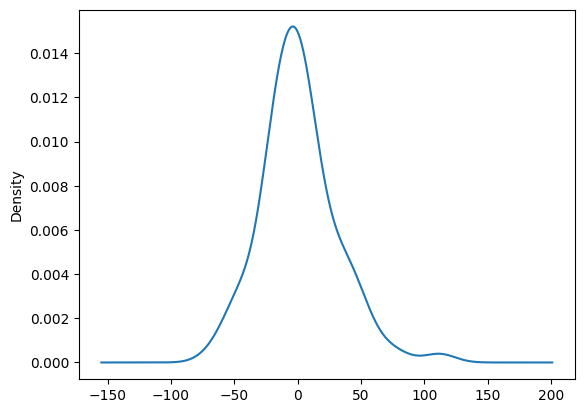

In [106]:
model_Arima_fit.resid.plot(kind='kde')

In [107]:
test_data['Predicted_ARIMA']=pred

C:\Users\Admin\AppData\Local\Temp\ipykernel_20756\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

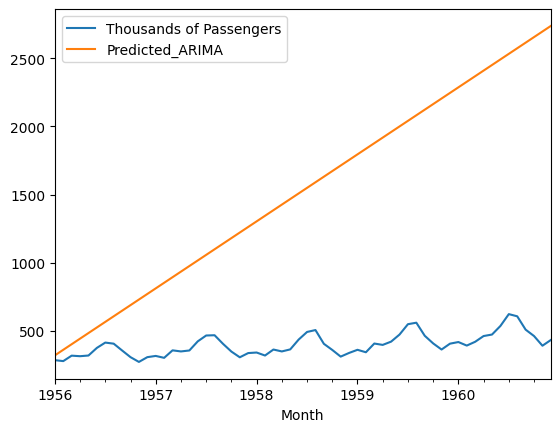

In [108]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

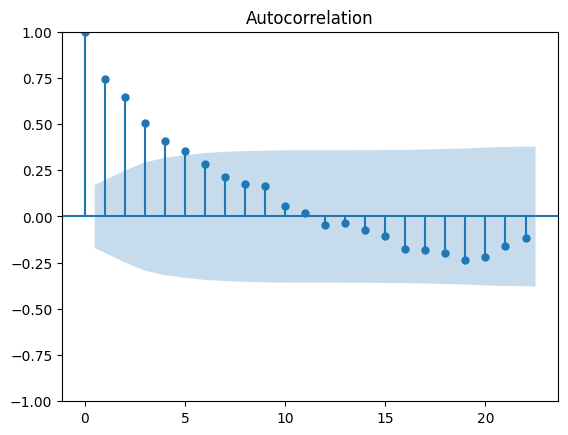

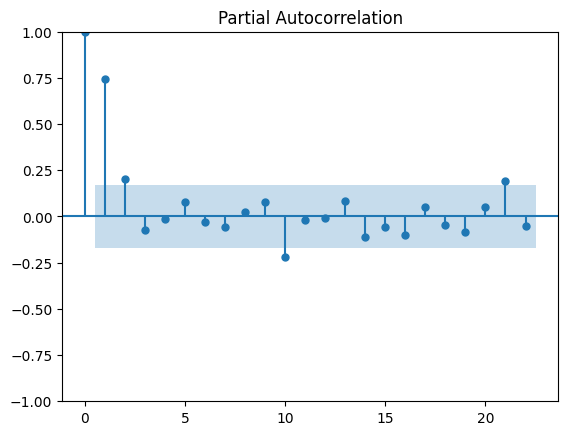

In [109]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [110]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMA (Seasonal AutoRegressive Integrated Moving Average) is an extension of the ARIMA model that incorporates seasonality in time series data. It's used for forecasting time series data that exhibits both non-seasonal and seasonal patterns. SARIMA models are particularly useful when the data displays repeating patterns at regular intervals, such as daily, monthly, or yearly cycles.

A SARIMA model is defined by the combination of parameters `(p, d, q) × (P, D, Q, s)`:

1. **p (AutoRegressive Order):** The same as in the non-seasonal ARIMA model. It represents the number of lagged observations of the dependent variable included in the model's autoregressive component.

2. **d (Differencing Order):** The same as in the non-seasonal ARIMA model. It represents the number of times the data is differenced to achieve stationarity.

3. **q (Moving Average Order):** The same as in the non-seasonal ARIMA model. It represents the number of lagged forecast errors of the dependent variable included in the model's moving average component.

4. **P (Seasonal AutoRegressive Order):** This parameter introduces the seasonal autoregressive component, similar to the AR component but applied to the seasonal pattern. It represents the number of seasonal lagged observations used to predict the current value.

5. **D (Seasonal Differencing Order):** This parameter introduces the seasonal differencing component, similar to the non-seasonal differencing but applied to the seasonal pattern. It represents the number of times the seasonal data is differenced to achieve seasonally stationary data.

6. **Q (Seasonal Moving Average Order):** This parameter introduces the seasonal moving average component, similar to the MA component but applied to the seasonal pattern. It represents the number of seasonal lagged forecast errors used to predict the current value.

7. **s (Seasonal Period):** This parameter specifies the length of the seasonal cycle. For example, if the data follows a yearly cycle, `s` would be 12 for monthly data (12 months in a year).

The "seasonal factor" you mentioned likely refers to the impact of seasonality on the time series data. Seasonality is a repeating pattern that occurs at regular intervals, and it can significantly influence the data's behavior. A seasonal factor represents the effect of the seasonal component on the time series. In a SARIMA model, the seasonal factors (represented by the seasonal AR, MA, and differencing components) capture the repeating patterns and help improve the model's accuracy when forecasting data with strong seasonal variations.

SARIMA models are powerful tools for forecasting time series data that displays both non-seasonal and seasonal patterns. They account for various levels of autocorrelation, trend, and seasonality in the data, making them suitable for a wide range of applications, from economics to climate science.

In [118]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

d:\Data_Science_Notes\dsenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Data_Science_Notes\dsenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [119]:
model_SARIMA_fit=model_SARIMA.fit()

d:\Data_Science_Notes\dsenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [120]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Sat, 24 Aug 2024   AIC                            548.481
Time:                                     20:07:05   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5983      0.937      0.638      0.523      -1.239       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4525      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1837      1.165      0.158      0.875      -2.099       2.467
ma.L2         -0.5341      1.263     -0.423      0.672      -3.009       1.940
ma.L3         -0.0986      0.384     -0.257      0.798      -0.852       0.655
ma.L4         -0.1273      0.338     -0.377      0.706      -0.789       0.535
ma.L5          0.2471      0.357      0.693      0.489      -0.452       0.947
sigma2        87.7323     81.217      1.080      0.280     -71.451     246.915
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [114]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,2574.0
1960-09-01,508.0,-98.0,-82.0,45.0,2615.0
1960-10-01,461.0,-47.0,51.0,54.0,2656.0
1960-11-01,390.0,-71.0,-24.0,28.0,2697.0
1960-12-01,432.0,42.0,113.0,27.0,2738.0


In [121]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [122]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

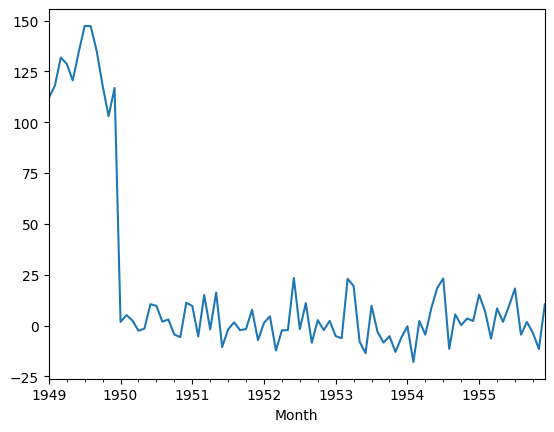

In [117]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

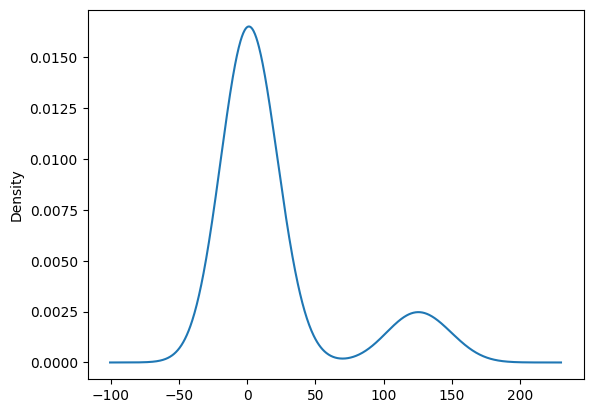

In [123]:
model_SARIMA_fit.resid.plot(kind='kde')

In [124]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\Admin\AppData\Local\Temp\ipykernel_20756\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [125]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,319.0,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,360.0,NaN
1956-03-01,317.0,40.0,47.0,50.0,401.0,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,442.0,NaN
1956-05-01,318.0,5.0,9.0,48.0,483.0,NaN
1956-06-01,374.0,56.0,51.0,59.0,524.0,NaN
1956-07-01,413.0,39.0,-17.0,49.0,565.0,403.397201
1956-08-01,405.0,-8.0,-47.0,58.0,606.0,385.070235
1956-09-01,355.0,-50.0,-42.0,43.0,647.0,349.444431


<Axes: xlabel='Month'>

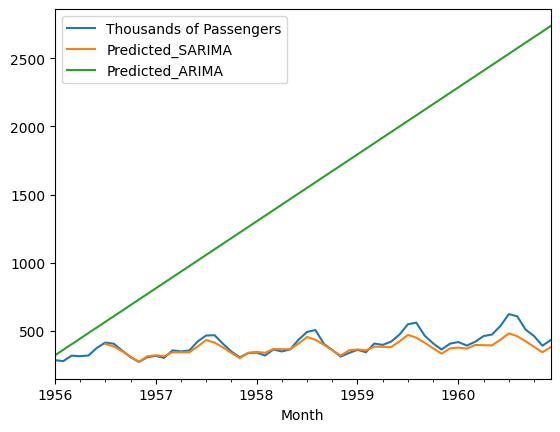

In [126]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()